In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#Black-Scholes Parameters
r = 0.1
σ = 0.4

In [54]:
S = 60
S0 = 50
K = 50

In [55]:
T = 5/12
N = 5
dt = T/N

In [56]:
def calc_u(dt,r=r,σ=σ):
    return np.exp(σ*np.sqrt(dt))

def calc_d(dt,r=r,σ=σ):
    return np.exp(-σ*np.sqrt(dt))

def calc_p(dt,r=r,σ=σ):
    u = calc_u(dt,r,σ,)
    d = calc_d(dt,r,σ)
    return (np.exp(r*dt) - d)/(u - d)

In [57]:
#Binomial Tree Parameters
u = calc_u(dt)
d = calc_d(dt)
p = calc_p(dt)

In [58]:
def payoff(S,K,option_type = 0, P = 0,call=True):
    # option_type: 0 vanilla, 4 pay-later
    #call = True for call option and call = False for put option
    if option_type == 0:
        if call:
            return np.maximum(0,S - K)
        else:
            return np.maximum(0,K - S)
    elif option_type == 4:
        return np.where(S > K,S - K - P,0)
    else:
        return None

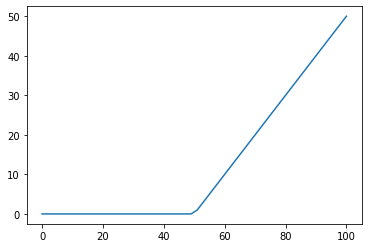

In [59]:
ls = np.linspace(0,100)
plt.plot(ls,payoff(ls,K))

In [60]:
np.exp(-r*dt)*(p*payoff(u*S0,K) + (1-p)*payoff(d*S0,K))

3.079050938401527

In [61]:
def next_period_stock_price(stock_prices,T):
    stock_prices = np.array([stock_prices]).reshape(1,-1)
    stock_prices = np.append(u*stock_prices,stock_prices[:,-1]*d)
    if T==1:
        return stock_prices
    return next_period_stock_price(stock_prices,T-1)

In [62]:
def next_period_stock(stock_prices,T,p=p,u=u,d=d):
    stock_prices = np.array([stock_prices]).reshape(1,-1)
    v = np.zeros((1,np.size(stock_prices)+1))
    v[:,:-1] = p*u*stock_prices
    v[:,1:] = (1-p)*d*stock_prices
    #return v
    if T == 1:
        return v
    else:
        return next_period_stock(v,T-1,p,u,d)

In [63]:
stock_prices = S0
stock_prices = next_period_stock(stock_prices,N)
np.sum(stock_prices)*np.exp(-r*T)

9.900729784905018

In [68]:
def binomial_pricing_1(N,T=T,S0=S0,K=K,r=r,σ=σ,is_call=True):
    #European Call
    dt = T/N
    u = calc_u(dt,r,σ)
    d = calc_d(dt,r,σ)
    p = calc_p(dt,r,σ)
    #print(u,d,p)
    mat = np.zeros((N+1,N+1))
    mat[0][0] = S0
    for j in range(1,N+1):
        for i in range(j):
            mat[i][j] = u*mat[i][j-1]
        mat[j][j] = mat[j-1][j-1]*d
    #print(mat)
    mat[:,-1] = payoff(mat[:,-1],K,call=is_call)
    #print(mat)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            mat[i][j] = np.exp(-r*dt)*(p*mat[i][j+1] + (1-p)*mat[i+1][j+1])
    return mat[0][0]

In [65]:
for i in [5,10,20,50,100,500,1000]:
    print(i,binomial_pricing_1(i))

5 6.3595458610589155
10 5.990951182999787
20 6.053260644489757
50 6.091105469330895
100 6.103790296748195
500 6.113961979205481
1000 6.115234894578806


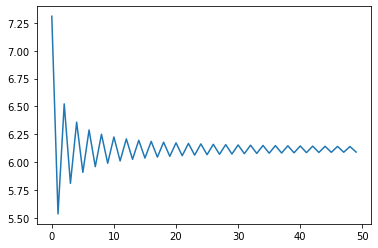

In [15]:
option_prices = np.zeros(50)
for i in range(1,50+1):
    option_prices[i-1] = binomial_pricing_1(i)
plt.plot(option_prices)

In [16]:
S0 = 12
σ = 0.2
r = 0.1
K = 14
T = 10/12
N = 10

In [17]:
def binomial_pricing_2(P,N,T=T,S0=S0,K=K,r=r,σ=σ):
    #Pay-Later Call
    dt = T/N
    u = calc_u(dt,r,σ)
    d = calc_d(dt,r,σ)
    p = calc_p(dt,r,σ)
    #print(u,d,p)
    mat = np.zeros((N+1,N+1))
    mat[0][0] = S0
    for j in range(1,N+1):
        for i in range(j):
            mat[i][j] = u*mat[i][j-1]
        mat[j][j] = mat[j-1][j-1]*d
    #print(mat)
    mat[:,-1] = payoff(mat[:,-1],K,4,P)
    #print(mat)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            mat[i][j] = np.exp(-r*dt)*(p*mat[i][j+1] + (1-p)*mat[i+1][j+1])
    #print(mat)
    return mat[0][0]

In [18]:
def bin_search(N,ϵ = 0.01):
    l , r = 0 , 100
    while l < r:
        m = (l + r)/2
        expected_value = binomial_pricing_2(m,N)
        print(expected_value,l,r)
        if expected_value > ϵ:
            l = m
        elif expected_value < -ϵ:
            r = m
        else:
            return m

In [19]:
bin_search(10,0.00001)

-12.498716019972948 0 100
-5.983106648583793 0 50.0
-2.7253019628892154 0 25.0
-1.0963996200419268 0 12.5
-0.2819484486182823 0 6.25
0.12527713709353985 0 3.125
-0.07833565576237125 1.5625 3.125
0.02347074066558429 1.5625 2.34375
-0.027432457548393494 1.953125 2.34375
-0.001980858441404617 1.953125 2.1484375
0.010744941112089835 1.953125 2.05078125
0.004382041335342593 2.001953125 2.05078125
0.001200591446969031 2.0263671875 2.05078125
-0.0003901334972177671 2.03857421875 2.05078125
0.0004052289748755838 2.03857421875 2.044677734375
7.547738828891143e-06 2.0416259765625 2.044677734375


2.04315185546875

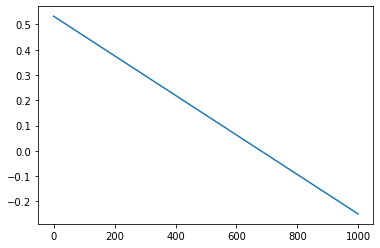

In [20]:
ks = np.linspace(0,3,1000)
ls = np.zeros(1000)
for i in range(ks.size):
    ls[i] =  binomial_pricing_2(ks[i],10)
plt.plot(ls)

In [21]:
def binomial_pricing_2f(P,N,T=T,S0=S0,K=K,r=r,σ=σ):
    #Pay-Later Call
    #f means faster i.e optimized version
    dt = T/N
    u = calc_u(dt,r,σ)
    d = calc_d(dt,r,σ)
    p = calc_p(dt,r,σ)
    p_u = np.exp(-r*dt)*p
    p_d = np.exp(-r*dt)*(1-p)
    #print(u,d,p)
    mat = np.zeros((N+1))
    mat[0] = S0
    #print(mat)
    for j in range(1,N+1):
        prev = mat[j-1]
        for i in range(j):
            mat[i] = u*mat[i]
        mat[j] = prev*d
        #print(mat)
    #print(mat)
    mat = payoff(mat,K,4,P)
    #print(mat)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            mat[i] = p_u*mat[i] + p_d*mat[i+1]
        #print(mat)
    #print(mat)
    return mat[0]

In [22]:
%%time
binomial_pricing_2f(30,1000)

CPU times: user 390 ms, sys: 0 ns, total: 390 ms
Wall time: 391 ms


-8.095973047295855

In [23]:
%%time
binomial_pricing_2(30,1000)

CPU times: user 1.71 s, sys: 10.2 ms, total: 1.72 s
Wall time: 1.73 s


-8.09597304729539

In [66]:
S0 = 50
σ = 0.4
r = 0.05
K = 50
T = 5/12
N = 100

In [48]:
def binomial_pricing_3(N,T=T,S0=S0,K=K,r=r,σ=σ,is_call=True):
    #American
    dt = T/N
    u = calc_u(dt,r,σ)
    d = calc_d(dt,r,σ)
    p = calc_p(dt,r,σ)
    p_u = np.exp(-r*dt)*p
    p_d = np.exp(-r*dt)*(1-p)
    #print(u,d,p)
    mat = np.zeros((N+1,N+1))
    mat[0][0] = S0
    for j in range(1,N+1):
        for i in range(j):
            mat[i][j] = u*mat[i][j-1]
        mat[j][j] = mat[j-1][j-1]*d
    #print(mat)
    mat[:,-1] = payoff(mat[:,-1],K,call=is_call)
    #print(mat)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            mat[i][j] = max(payoff(mat[i][j],K,call=is_call),p_u*mat[i][j+1] + p_d*mat[i+1][j+1])
    return mat[0][0]

In [70]:
binomial_pricing_3(N,is_call=False)

4.666736910068939

In [72]:
binomial_pricing_1(N,is_call=True)

5.602264076034889

In [73]:
binomial_pricing_1(N,is_call=False)

4.571373142597132